In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = np.loadtxt('aerogerador.dat')

v = data[:, 0]
pot = data[:, 1]

In [4]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

def aic(v, k, erro):
    SEQ = np.sum(erro ** 2)
    return (len(v) * np.log(SEQ)) + 2*k

[-1.79827226e-01  8.16387625e+00 -3.93045528e+00  1.24622594e+00
 -5.37024696e-02 -3.75305436e-04]


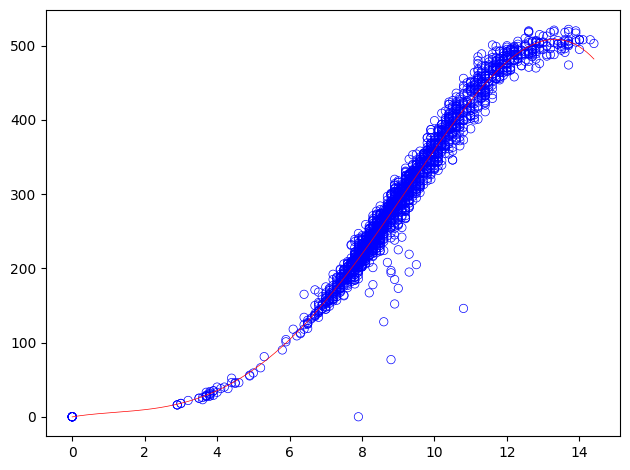

In [14]:
k = 5
p = k + 1
y = pot
data_values = []

X = np.column_stack([v ** i for i in range(k + 1)])
B = np.linalg.inv(X.T @ X) @ X.T @ y
print(B)
ypred = X @ B
erro = y - ypred

R2 = r2(y, erro)
R2_ajustado = r2_ajustado(y, erro, len(y), k + 1)
AIC = aic(v, k, erro)
data_values.append((R2, R2_ajustado, AIC))

vv = np.arange(min(v), max(v) + 0.1, 0.1).reshape(-1, 1)
XX = np.column_stack([vv ** (l - 1) for l in range(1, k + 2)])
ypred2 = XX @ B

plt.scatter(v, y, color='blue', marker='o', label='Velocidade x Potência', facecolors='none', edgecolors='blue', linewidths=0.5)
plt.plot(vv, ypred2, color='red', linestyle='-', label='Curva de Regressão', linewidth=0.5)

# # Salva o gráfico como imagem
# plt.savefig(f'grafico_{k}.png')

plt.tight_layout()  # Ajusta o layout dos subplots
plt.show()

In [13]:
X.shape

(2250, 6)

In [9]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
data = pd.DataFrame(data_values, columns=['R2', 'R2_ajustado', 'AIC'])
data

,R2,R2_ajustado,AIC
0,0.973726,0.973655,30151.090785
